## read data

### csv

In [ ]:
import pandas as pd
import scanpy as sc

df = pd.read_csv("")
df

,cell,ENSG00000237683,Unknown,LINC01409,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,MT-ND6,MT-CYB,ENSG00000215750,ENSG00000215781,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215764,ENSG00000215700,ENSG00000215699
0,b.cells,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3990,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3991,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3992,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### anndata

In [ ]:
import scanpy as sc

adata = sc.read_h5ad("")
adata

## execution - stLENS

In [3]:
from stLENS import stLENS as stlens

/home/khyeonmin/micromamba/envs/scLENS-py/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### directory setting

In [4]:
import os
import shutil

file_name = "test_stlens"

directory = f"./output/{file_name}"
stlens.directory = directory

In the preprocess stage, if filter is set to False, filtering is performed using Scanpy.

In [ ]:
# import scanpy as sc

# adata.var['mt'] = adata.var_names.str.startswith('MT-')
# sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=True, inplace=False)

# sc.pp.filter_cells(adata, min_genes=200)
# sc.pp.filter_genes(adata, min_cells=15)

select "gpu" or "cpu" for device

In [5]:
stlens.device = "gpu"

After filtering >> shape: (30000, 14499)
plotting the result of preprocessing


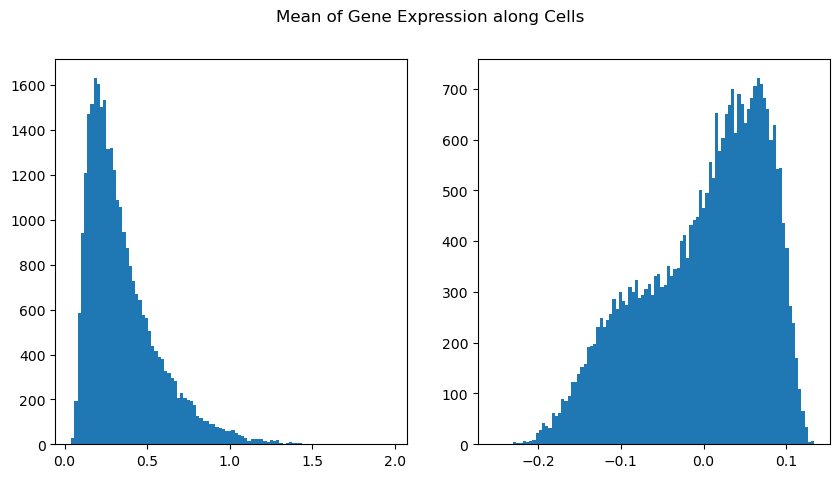

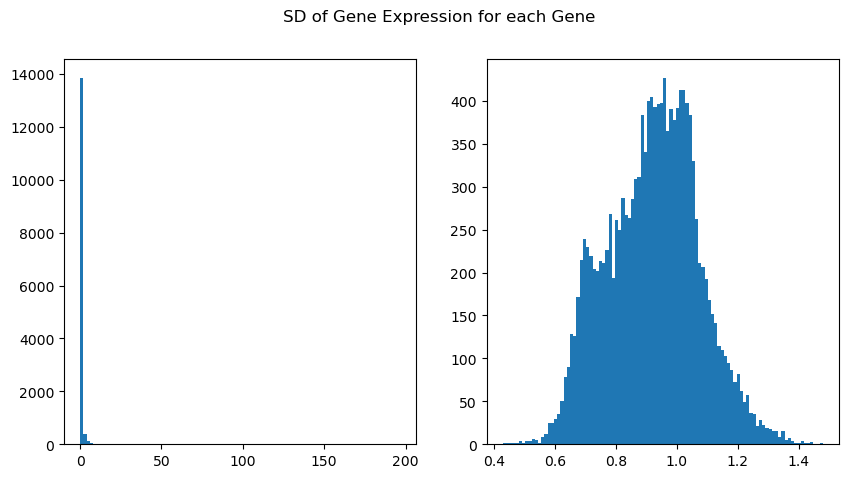

In [6]:
stlens.preprocess(adata, filter=True, plot=True)

In [7]:
num = stlens.find_optimal_pc(plot_mp=False)
num

sparsity_th: 0.03410385059438219
Min(corr): 0.051640015095472336, sparsity: 0.999
Min(corr): 0.04501298815011978, sparsity: 0.998
Min(corr): 0.04128574952483177, sparsity: 0.997
Min(corr): 0.03912224620580673, sparsity: 0.996
Min(corr): 0.03796440362930298, sparsity: 0.995
Min(corr): 0.03651469573378563, sparsity: 0.994
Min(corr): 0.03660586103796959, sparsity: 0.993
Min(corr): 0.035384468734264374, sparsity: 0.992
Min(corr): 0.034980401396751404, sparsity: 0.991
Min(corr): 0.034427154809236526, sparsity: 0.99
Min(corr): 0.03394704684615135, sparsity: 0.989
Min(corr): 0.033570900559425354, sparsity: 0.988
Min(corr): 0.033624809235334396, sparsity: 0.987
Min(corr): 0.03262510895729065, sparsity: 0.986
Min(corr): 0.03282243758440018, sparsity: 0.985
Max interactions exceeded!
lambda_c: 3.4126143
Number of signal components: 1171


100%|██████████| 20/20 [07:09<00:00, 21.48s/it]


222

In [ ]:
stlens.calc_pca()

In [ ]:
stlens.plot_robust_score()